Project 1: Writing a Data Scientist Blog Post

Boston Airbnb Data

Import required packages:

In [7443]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
import zipfile
%matplotlib inline

Get familiar with the contents of the calendar file.

In [7444]:
# Open calendar data file
calendar_path = r"C:\Users\emma1\Project_1_Data-Science-Blog\Boston Airbnb Open Data\calendar.csv"
calendar = pd.read_csv(calendar_path)
# View top five rows
calendar.head()

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


In [7445]:
# How big is the dataset?
calendar.shape # 4 columns : 1,308,890 rows of data

(1308890, 4)

In [7446]:
# What data types are included in this dataset?
calendar.dtypes # Why is price listed as an object?

listing_id     int64
date          object
available     object
price         object
dtype: object

In [7447]:
# Count null values
calendar.isnull().sum() # 665,853 null values in price column

listing_id         0
date               0
available          0
price         665853
dtype: int64

In [7448]:
# Determine proportion of null values
calendar.isnull().mean() # 50.8716% null values in price column

listing_id    0.000000
date          0.000000
available     0.000000
price         0.508716
dtype: float64

In [7449]:
# Look at descriptive statistics for each field
calendar.describe(include='all') # statistics not very useful - only listing_id is an int field, others are object fields

,listing_id,date,available,price
count,1.308890e+06,1308890,1308890,643037
unique,NaN,365,2,1246
top,NaN,2016-09-06,f,$150.00
freq,NaN,3586,665853,20752
mean,8.442118e+06,NaN,NaN,NaN
std,4.500149e+06,NaN,NaN,NaN
min,3.353000e+03,NaN,NaN,NaN
25%,4.679319e+06,NaN,NaN,NaN
50%,8.578710e+06,NaN,NaN,NaN
75%,1.279603e+07,NaN,NaN,NaN


Clean up calendar file.

In [7450]:
# Change date field from object to datetime
calendar['date'] = pd.to_datetime(calendar['date'])
calendar.dtypes # confirm change was successful

listing_id             int64
date          datetime64[ns]
available             object
price                 object
dtype: object

In [7451]:
# price field has object dtype due to $ character
# Remove $ from beginning of each string
calendar['price'] = calendar['price'].str.replace("$", "")
calendar['price'].value_counts()

price
150.00      20752
65.00       17518
75.00       16249
100.00      15499
200.00      14326
            ...  
1,056.00        1
1,381.00        1
1,707.00        1
2,080.00        1
1,810.00        1
Name: count, Length: 1246, dtype: int64

In [7452]:
# Convert price field to numeric
calendar['price'] = pd.to_numeric(calendar['price'], errors= "coerce")
calendar.dtypes # confirm change was successful

listing_id             int64
date          datetime64[ns]
available             object
price                float64
dtype: object

Visualize the cleaned calendar data.

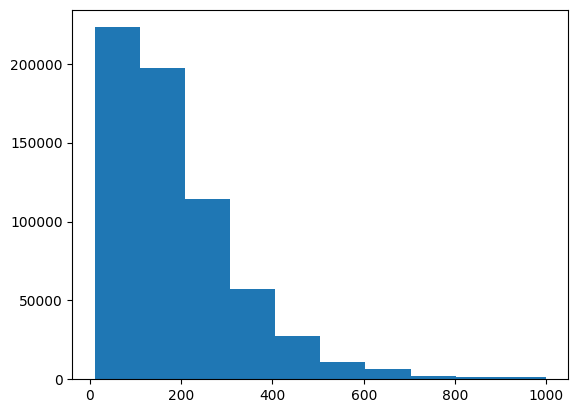

In [7453]:
plt.hist(calendar['price']);
# right skewed distribution

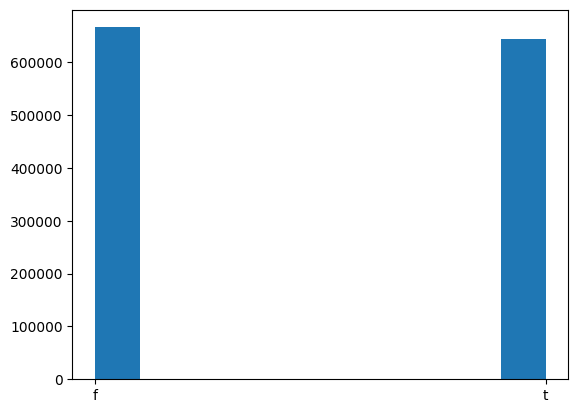

In [7454]:
plt.hist(calendar['available']);
# Fairly equal distribution of T and F values

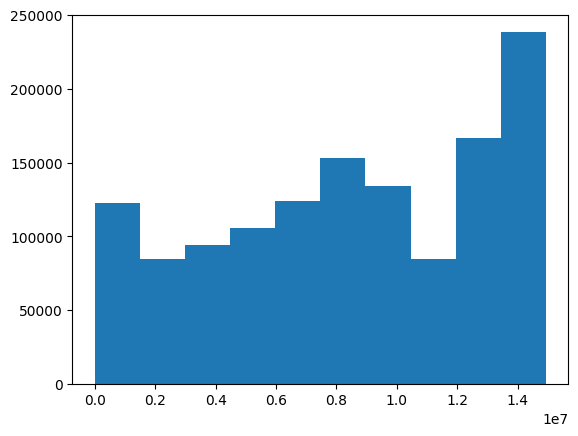

In [7455]:
plt.hist(calendar['listing_id']);
# can't determine much from this distribution

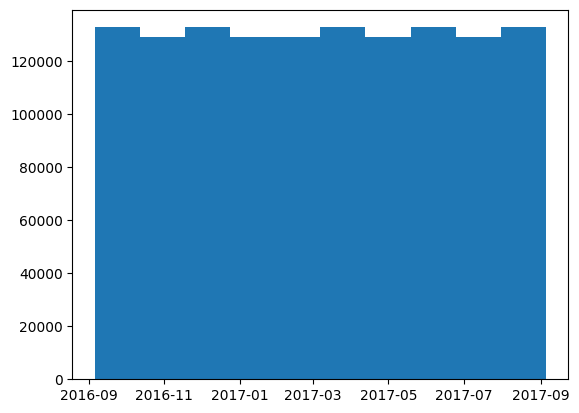

In [7456]:
plt.hist(calendar['date']);
# not helpful at all

Impute numeric values for price field.

In [7457]:
calendar.isnull().sum()

listing_id         0
date               0
available          0
price         668421
dtype: int64

In [7458]:
calendar.isnull().mean()

listing_id    0.000000
date          0.000000
available     0.000000
price         0.510678
dtype: float64

In [7459]:
calendar['price'].fillna((calendar['price'].mean()), inplace = True)
calendar.isnull().mean() # confirm all null values filled in

C:\Users\emma1\AppData\Local\Temp\ipykernel_10032\4026195615.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  calendar['price'].fillna((calendar['price'].mean()), inplace = True)


listing_id    0.0
date          0.0
available     0.0
price         0.0
dtype: float64

Get familiar with listings file. 

In [7460]:
# Open listings data file
listings_path = r"C:\Users\emma1\Project_1_Data-Science-Blog\Boston Airbnb Open Data\listings.csv"
listings = pd.read_csv(listings_path)
# View top five rows
print(listings.head()) # lots of data here

         id                            listing_url       scrape_id  \
0  12147973  https://www.airbnb.com/rooms/12147973  20160906204935   
1   3075044   https://www.airbnb.com/rooms/3075044  20160906204935   
2      6976      https://www.airbnb.com/rooms/6976  20160906204935   
3   1436513   https://www.airbnb.com/rooms/1436513  20160906204935   
4   7651065   https://www.airbnb.com/rooms/7651065  20160906204935   

  last_scraped                                           name  \
0   2016-09-07                     Sunny Bungalow in the City   
1   2016-09-07              Charming room in pet friendly apt   
2   2016-09-07               Mexican Folk Art Haven in Boston   
3   2016-09-07  Spacious Sunny Bedroom Suite in Historic Home   
4   2016-09-07                            Come Home to Boston   

                                             summary  \
0  Cozy, sunny, family home.  Master bedroom high...   
1  Charming and quiet room in a second floor 1910...   
2  Come stay with a 

In [7461]:
# How big is this dataset?
listings.shape # 95 columns : 3,585 rows

(3585, 95)

In [7462]:
listings.columns # look at column names

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

In [7463]:
listings.describe(include='all')

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
count,3.585000e+03,3585,3.585000e+03,3585,3585,3442,2528,3585,3585,2170,...,2764.000000,3585,0.0,0.0,3585,3585,3585,3585,3585.000000,2829.000000
unique,NaN,3585,NaN,1,3504,3113,2268,3423,1,1728,...,NaN,1,NaN,NaN,2,4,2,2,NaN,NaN
top,NaN,https://www.airbnb.com/rooms/14504422,NaN,2016-09-07,Lux 2BR by Fenway w/WiFi,"The unit is stylishly designed for comfort, va...",The studio's kitchenette comes equipped with a...,Private room in a HOSTEL exclusive for Airbnb ...,none,Conveniently bordering the neighborhoods of th...,...,NaN,f,NaN,NaN,f,strict,f,f,NaN,NaN
freq,NaN,1,NaN,3585,8,21,17,7,3585,21,...,NaN,3585,NaN,NaN,2991,1582,3518,3348,NaN,NaN
mean,8.440875e+06,NaN,2.016091e+13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.168234,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.733891,1.970908
std,4.500787e+06,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.011116,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.415076,2.120561
min,3.353000e+03,NaN,2.016091e+13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.010000
25%,4.679319e+06,NaN,2.016091e+13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.480000
50%,8.577620e+06,NaN,2.016091e+13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,1.170000
75%,1.278953e+07,NaN,2.016091e+13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,2.720000


In [7464]:
# How many nulls? What proportion of nulls? What are the column types?
for column in listings.columns:
    num_null = listings[column].isnull().sum()
    prop_null = listings[column].isnull().mean()
    col_type = listings[column].dtype
    print(column + ":" + str(num_null) + "," + str(prop_null) + "," + str(col_type))

id:0,0.0,int64
listing_url:0,0.0,object
scrape_id:0,0.0,int64
last_scraped:0,0.0,object
name:0,0.0,object
summary:143,0.039888423988842396,object
space:1057,0.29483960948396093,object
description:0,0.0,object
experiences_offered:0,0.0,object
neighborhood_overview:1415,0.3947001394700139,object
notes:1975,0.5509065550906556,object
transit:1290,0.3598326359832636,object
access:1489,0.41534170153417016,object
interaction:1554,0.43347280334728033,object
house_rules:1192,0.33249651324965135,object
thumbnail_url:599,0.16708507670850767,object
medium_url:599,0.16708507670850767,object
picture_url:0,0.0,object
xl_picture_url:599,0.16708507670850767,object
host_id:0,0.0,int64
host_url:0,0.0,object
host_name:0,0.0,object
host_since:0,0.0,object
host_location:11,0.0030683403068340305,object
host_about:1309,0.36513249651324964,object
host_response_time:471,0.13138075313807532,object
host_response_rate:471,0.13138075313807532,object
host_acceptance_rate:471,0.13138075313807532,object
host_is_superh

Clean up listings file.

In [7465]:
# Drop text-heavy columns - not sure how to clean these up for this analysis
listings_filtered = listings.drop(['description', 'summary', 'space', 'neighborhood_overview', 'notes', 
                                   'transit', 'access', 'interaction', 'house_rules', 'host_about', 
                                   'name', 'host_name', 'host_verifications', 'amenities'], axis = 1)

In [7466]:
# Remove URL fields
listings_filtered = listings_filtered.drop(['host_thumbnail_url', 'listing_url', 'thumbnail_url', 'host_url', 'host_picture_url',
                                            'medium_url', 'picture_url', 'xl_picture_url'], axis = 1)

In [7467]:
# Remove location fields unlikely to be helpful in analysis
# Lat and Long 
listings_filtered['country'].value_counts()
# country has one value: United States
listings_filtered['country_code'].value_counts()
# country_code has one value: US
# street
listings_filtered['state'].value_counts()
# state has one value: MA
listings_filtered['market'].value_counts()
# most in Boston, but 1 in San Francisco, 1 in Other (Domestic), and 1 in Other (International)
# city, zipcode, smart_location, neighbourhood, and neighbourhood_cleansed all contain similar info - keep only one
# is_location_exact doesn't seem particularly helpful
listings_filtered['jurisdiction_names'].isnull().mean()
# all values are null

listings_filtered = listings_filtered.drop(['latitude', 'longitude', 'country', 'country_code', 'street', 'state', 'market', 
                                            'neighbourhood', 'smart_location', 'is_location_exact', 'city', 'zipcode', 
                                            'jurisdiction_names'], axis = 1)

In [7468]:
# Remove additional fields with negligent value in analysis
listings_filtered['last_scraped'].value_counts()
# last_scraped has one value: 2016-09-07
listings_filtered['calendar_last_scraped'].value_counts()
# calendar_last_scraped has one value:2016-09-06
listings_filtered['scrape_id'].value_counts()
# scrape_id has one value:20160906204935
listings_filtered['experiences_offered'].value_counts()
# experiences_offered has one value: none
listings_filtered['id'].value_counts()
# every id appears only once
# host_id
listings_filtered['has_availability'].isnull().mean()
listings_filtered['neighbourhood_group_cleansed'].isnull().mean()
listings_filtered['license'].isnull().mean()
# all rows are null
# not too interested in host_location or host_neighbourhood

listings_filtered = listings_filtered.drop(['last_scraped', 'calendar_last_scraped', 'scrape_id', 'id', 
                                            'experiences_offered', 'host_id', 'has_availability', 
                                            'neighbourhood_group_cleansed', 'license', 'host_location',
                                            'host_neighbourhood'], axis = 1)

In [7469]:
# Let's recheck:
# How many nulls? What proportion of nulls? What are the column types?
for column in listings_filtered.columns:
    num_null = listings_filtered[column].isnull().sum()
    prop_null = listings_filtered[column].isnull().mean()
    col_type = listings_filtered[column].dtype
    print(column + ":" + str(num_null) + "," + str(prop_null) + "," + str(col_type))

host_since:0,0.0,object
host_response_time:471,0.13138075313807532,object
host_response_rate:471,0.13138075313807532,object
host_acceptance_rate:471,0.13138075313807532,object
host_is_superhost:0,0.0,object
host_listings_count:0,0.0,int64
host_total_listings_count:0,0.0,int64
host_has_profile_pic:0,0.0,object
host_identity_verified:0,0.0,object
neighbourhood_cleansed:0,0.0,object
property_type:3,0.0008368200836820083,object
room_type:0,0.0,object
accommodates:0,0.0,int64
bathrooms:14,0.003905160390516039,float64
bedrooms:10,0.002789400278940028,float64
beds:9,0.002510460251046025,float64
bed_type:0,0.0,object
square_feet:3529,0.9843793584379359,float64
price:0,0.0,object
weekly_price:2693,0.7511854951185495,object
monthly_price:2697,0.7523012552301255,object
security_deposit:2243,0.6256624825662482,object
cleaning_fee:1107,0.3087866108786611,object
guests_included:0,0.0,int64
extra_people:0,0.0,object
minimum_nights:0,0.0,int64
maximum_nights:0,0.0,int64
calendar_updated:0,0.0,object
a

In [7470]:
listings_filtered.columns

Index(['host_since', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_listings_count',
       'host_total_listings_count', 'host_has_profile_pic',
       'host_identity_verified', 'neighbourhood_cleansed', 'property_type',
       'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'bed_type', 'square_feet', 'price', 'weekly_price', 'monthly_price',
       'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people',
       'minimum_nights', 'maximum_nights', 'calendar_updated',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'first_review', 'last_review',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'requires_license', 'instant_bookable',
       'cancellation_policy', 'require_gues

In [7471]:
# Why are price fields considered object type? Let's fix this.
listings_filtered[['weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee']].head()

,weekly_price,monthly_price,security_deposit,cleaning_fee
0,NaN,NaN,NaN,$35.00
1,$400.00,NaN,$95.00,$10.00
2,$395.00,"$1,350.00",NaN,NaN
3,NaN,NaN,$100.00,$50.00
4,NaN,NaN,NaN,$15.00


In [7472]:
# price field has object dtype due to $ character
# Remove $ from beginning of each string
listings_filtered['weekly_price'] = listings_filtered['weekly_price'].str.replace("$", "")
listings_filtered['monthly_price'] = listings_filtered['monthly_price'].str.replace("$", "")
listings_filtered['security_deposit'] = listings_filtered['security_deposit'].str.replace("$", "")
listings_filtered['cleaning_fee'] = listings_filtered['cleaning_fee'].str.replace("$", "")
listings_filtered['extra_people'] = listings_filtered['extra_people'].str.replace("$", "")
listings_filtered['price'] = listings_filtered['price'].str.replace("$", "")

listings_filtered[['weekly_price', 'monthly_price', 'security_deposit', 
                   'cleaning_fee', 'extra_people', 'price']].head() # confirm changes worked correctly

,weekly_price,monthly_price,security_deposit,cleaning_fee,extra_people,price
0,NaN,NaN,NaN,35.00,0.00,250.00
1,400.00,NaN,95.00,10.00,0.00,65.00
2,395.00,"1,350.00",NaN,NaN,20.00,65.00
3,NaN,NaN,100.00,50.00,25.00,75.00
4,NaN,NaN,NaN,15.00,0.00,79.00


In [7473]:
# Why is host response rate an object?
listings_filtered['host_response_rate'].head()

0     NaN
1    100%
2    100%
3    100%
4    100%
Name: host_response_rate, dtype: object

In [7474]:
# host_response_rate field has object dtype due to % character
# Remove % from end of each string
listings_filtered['host_response_rate'] = listings_filtered['host_response_rate'].str.replace("%", "")

listings_filtered['host_response_rate'].head() # confirm changes worked correctly

0    NaN
1    100
2    100
3    100
4    100
Name: host_response_rate, dtype: object

In [7475]:
# Why is host acceptance rate an object?
listings_filtered['host_acceptance_rate'].head()

0     NaN
1    100%
2     88%
3     50%
4    100%
Name: host_acceptance_rate, dtype: object

In [7476]:
# host_acceptance_rate field has object dtype due to % character
# Remove % from end of each string
listings_filtered['host_acceptance_rate'] = listings_filtered['host_acceptance_rate'].str.replace("%", "")

listings_filtered['host_acceptance_rate'].head() # confirm changes worked correctly

0    NaN
1    100
2     88
3     50
4    100
Name: host_acceptance_rate, dtype: object

In [7477]:
# Convert price and fee fields to numeric type
listings_filtered['weekly_price'] = pd.to_numeric(listings_filtered['weekly_price'], errors= "coerce")
listings_filtered['monthly_price'] = pd.to_numeric(listings_filtered['monthly_price'], errors= "coerce")
listings_filtered['security_deposit'] = pd.to_numeric(listings_filtered['security_deposit'], errors= "coerce")
listings_filtered['cleaning_fee'] = pd.to_numeric(listings_filtered['cleaning_fee'], errors= "coerce")
listings_filtered['extra_people'] = pd.to_numeric(listings_filtered['extra_people'], errors= "coerce")
listings_filtered['price'] = pd.to_numeric(listings_filtered['price'], errors= "coerce")


# Convert host_response_rate and host_acceptance_rate to numeric type
listings_filtered['host_response_rate'] = pd.to_numeric(listings_filtered['host_response_rate'], errors= "coerce")
listings_filtered['host_acceptance_rate'] = pd.to_numeric(listings_filtered['host_acceptance_rate'], errors= "coerce")


listings_filtered.dtypes # confirm change was successful

host_since                           object
host_response_time                   object
host_response_rate                  float64
host_acceptance_rate                float64
host_is_superhost                    object
host_listings_count                   int64
host_total_listings_count             int64
host_has_profile_pic                 object
host_identity_verified               object
neighbourhood_cleansed               object
property_type                        object
room_type                            object
accommodates                          int64
bathrooms                           float64
bedrooms                            float64
beds                                float64
bed_type                             object
square_feet                         float64
price                               float64
weekly_price                        float64
monthly_price                       float64
security_deposit                    float64
cleaning_fee                    

In [7478]:
# Post-filtering and cleaning: How many nulls? What proportion of nulls? What are the column types?
for column in listings_filtered.columns:
    num_null = listings_filtered[column].isnull().sum()
    prop_null = listings_filtered[column].isnull().mean()
    col_type = listings_filtered[column].dtype
    if num_null > 0:
        print(column + ":" + str(num_null) + "," + str(prop_null) + "," + str(col_type))
    else:
        continue

host_response_time:471,0.13138075313807532,object
host_response_rate:471,0.13138075313807532,float64
host_acceptance_rate:471,0.13138075313807532,float64
property_type:3,0.0008368200836820083,object
bathrooms:14,0.003905160390516039,float64
bedrooms:10,0.002789400278940028,float64
beds:9,0.002510460251046025,float64
square_feet:3529,0.9843793584379359,float64
price:12,0.0033472803347280333,float64
weekly_price:3009,0.8393305439330544,float64
monthly_price:3541,0.9877266387726639,float64
security_deposit:2317,0.6463040446304045,float64
cleaning_fee:1107,0.3087866108786611,float64
first_review:756,0.2108786610878661,object
last_review:756,0.2108786610878661,object
review_scores_rating:813,0.22677824267782426,float64
review_scores_accuracy:823,0.2295676429567643,float64
review_scores_cleanliness:818,0.22817294281729428,float64
review_scores_checkin:820,0.22873082287308227,float64
review_scores_communication:818,0.22817294281729428,float64
review_scores_location:822,0.2292887029288703,floa

Impute missing values for numeric fields.

In [7479]:
listings_num_vars = listings_filtered.select_dtypes(include=['float', 'int']).columns
for col in listings_num_vars:
    listings_filtered[col].fillna((listings_filtered[col].mean()), inplace = True)

C:\Users\emma1\AppData\Local\Temp\ipykernel_10032\1779950298.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  listings_filtered[col].fillna((listings_filtered[col].mean()), inplace = True)


In [7480]:
# Post-filtering and cleaning: How many nulls? What proportion of nulls? What are the column types?
for column in listings_filtered.columns:
    num_null = listings_filtered[column].isnull().sum()
    prop_null = listings_filtered[column].isnull().mean()
    col_type = listings_filtered[column].dtype
    if num_null > 0:
        print(column + ":" + str(num_null) + "," + str(prop_null) + "," + str(col_type))
    else:
        continue

host_response_time:471,0.13138075313807532,object
property_type:3,0.0008368200836820083,object
first_review:756,0.2108786610878661,object
last_review:756,0.2108786610878661,object


Get familiar with reviews file.

In [7481]:
# Import reviews dataset
reviews_path = r"C:\Users\emma1\Project_1_Data-Science-Blog\Boston Airbnb Open Data\reviews.csv"
reviews = pd.read_csv(reviews_path)

# View top five rows
print(reviews.head())

   listing_id       id        date  reviewer_id reviewer_name  \
0     1178162  4724140  2013-05-21      4298113       Olivier   
1     1178162  4869189  2013-05-29      6452964     Charlotte   
2     1178162  5003196  2013-06-06      6449554     Sebastian   
3     1178162  5150351  2013-06-15      2215611        Marine   
4     1178162  5171140  2013-06-16      6848427        Andrew   

                                            comments  
0  My stay at islam's place was really cool! Good...  
1  Great location for both airport and city - gre...  
2  We really enjoyed our stay at Islams house. Fr...  
3  The room was nice and clean and so were the co...  
4  Great location. Just 5 mins walk from the Airp...  


In [7482]:
# How big is this dataset?
reviews.shape # 6 columns : 68,275 rows

c:\Users\emma1\Project_1_Data-Science-Blog\.venv\Lib\site-packages\IPython\core\displayhook.py:281: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


(68275, 6)

In [7483]:
reviews.value_counts()

listing_id  id        date        reviewer_id  reviewer_name  comments                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            
14843783    99947305  2016-09-06  93113474     Casper         The host canceled this reservation 62 days before arrival. This is an automated posting.                                                                                                                                                                                               

In [7484]:
reviews.isnull().mean()
reviews.isnull().sum()
# 53 rows missing comments - no way to impute values

listing_id        0
id                0
date              0
reviewer_id       0
reviewer_name     0
comments         53
dtype: int64

In [7485]:
reviews['reviewer_id'].value_counts()
# not sure what to do with this information...looks like the listings file will be more useful for modeling

reviewer_id
12096536    37
40651868    25
46024609    22
52667131    21
18607361    18
            ..
22034145     1
40052513     1
77129134     1
15799803     1
7671888      1
Name: count, Length: 63789, dtype: int64

Question 1: What factors make the highest rated Airbnb properties so popular?

In [7486]:
listings_filtered.columns

Index(['host_since', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_listings_count',
       'host_total_listings_count', 'host_has_profile_pic',
       'host_identity_verified', 'neighbourhood_cleansed', 'property_type',
       'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'bed_type', 'square_feet', 'price', 'weekly_price', 'monthly_price',
       'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people',
       'minimum_nights', 'maximum_nights', 'calendar_updated',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'first_review', 'last_review',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'requires_license', 'instant_bookable',
       'cancellation_policy', 'require_gues

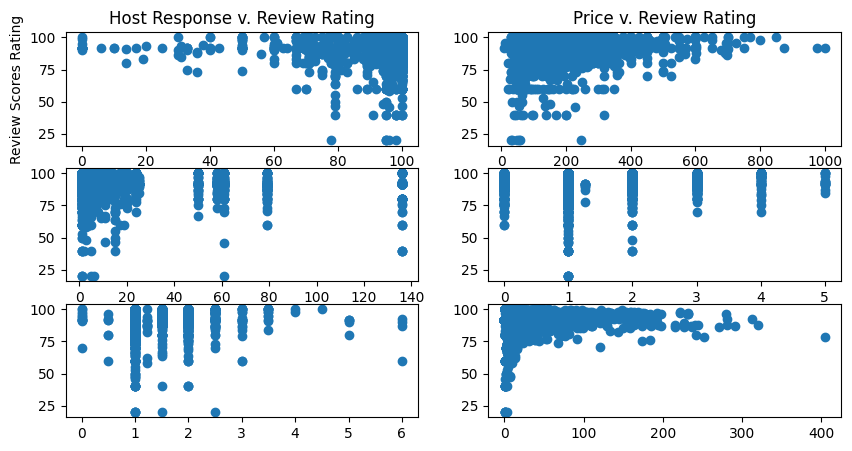

In [ ]:
fig, axes = plt.subplots(3, 2, figsize = (10,5))
axes[0, 0].scatter(listings_filtered['host_response_rate'], listings_filtered['review_scores_rating'])
axes[0, 0].set_title('Host Response v. Review Rating')
axes[0, 0].set_xlabel('Host Response Rate')
axes[0, 0].set_ylabel('Review Scores Rating')
# does not appear to be a strong relationship, possible non-linear negative correlation?
axes[0, 1].scatter(listings_filtered['price'], listings_filtered['review_scores_rating'])
axes[0, 1].set_title('Price v. Review Rating')
axes[0, 1].set_xlabel('Price')
# appears to be a non-linear positive correlation
axes[1, 0].scatter(listings_filtered['calculated_host_listings_count'], listings_filtered['review_scores_rating'])
# does not appear to be any relationship
axes[1, 1].scatter(listings_filtered['bedrooms'], listings_filtered['review_scores_rating'])
# some positive correlation
axes[2, 0].scatter(listings_filtered['bathrooms'], listings_filtered['review_scores_rating'])
# some positive correlation
axes[2, 1].scatter(listings_filtered['number_of_reviews'], listings_filtered['review_scores_rating'])
# possible non-linear positive correlation


In [ ]:
dtypes = listings.dtypes
dtypes
l_num_vars = listings.select_dtypes(include='number')
l_num_vars.columns


In [ ]:
# Do hosts with more listings have higher ratings?

plt.scatter(l_num_vars['host_listings_count'], l_num_vars['review_scores_rating']); # not a strong correlation or relationship

In [ ]:
# Do hosts with more monthly reviews have higher ratings?

plt.scatter(l_num_vars['reviews_per_month'], l_num_vars['review_scores_rating']); # apparent positive but non-linear relationship

In [ ]:
l_num_vars[['availability_30', 'availability_60', 'availability_90', 'availability_365', 'has_availability']].head()

In [ ]:
plt.subplot(l_num_vars['reviews_per_month'], l_num_vars[['availability_30', 'availability_60', 'availability_90', 'availability_365', 'has_availability']]);

Question 2: How do fees impact bookings?

Question 3: How do host characteristics impact bookings and reviews?